In [1]:
!pip install seaborn

In [2]:
!pip install plotly 

In [3]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [4]:
df = pd.read_csv('insurance_claims.csv')

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
# Replacing missing values denotes by '?' 
df.replace('?', np.nan, inplace=True)

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Data Preprocessing

In [9]:
# missing value
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
# Visualizing Missing Values
!pip install missingno
import missingno as msno

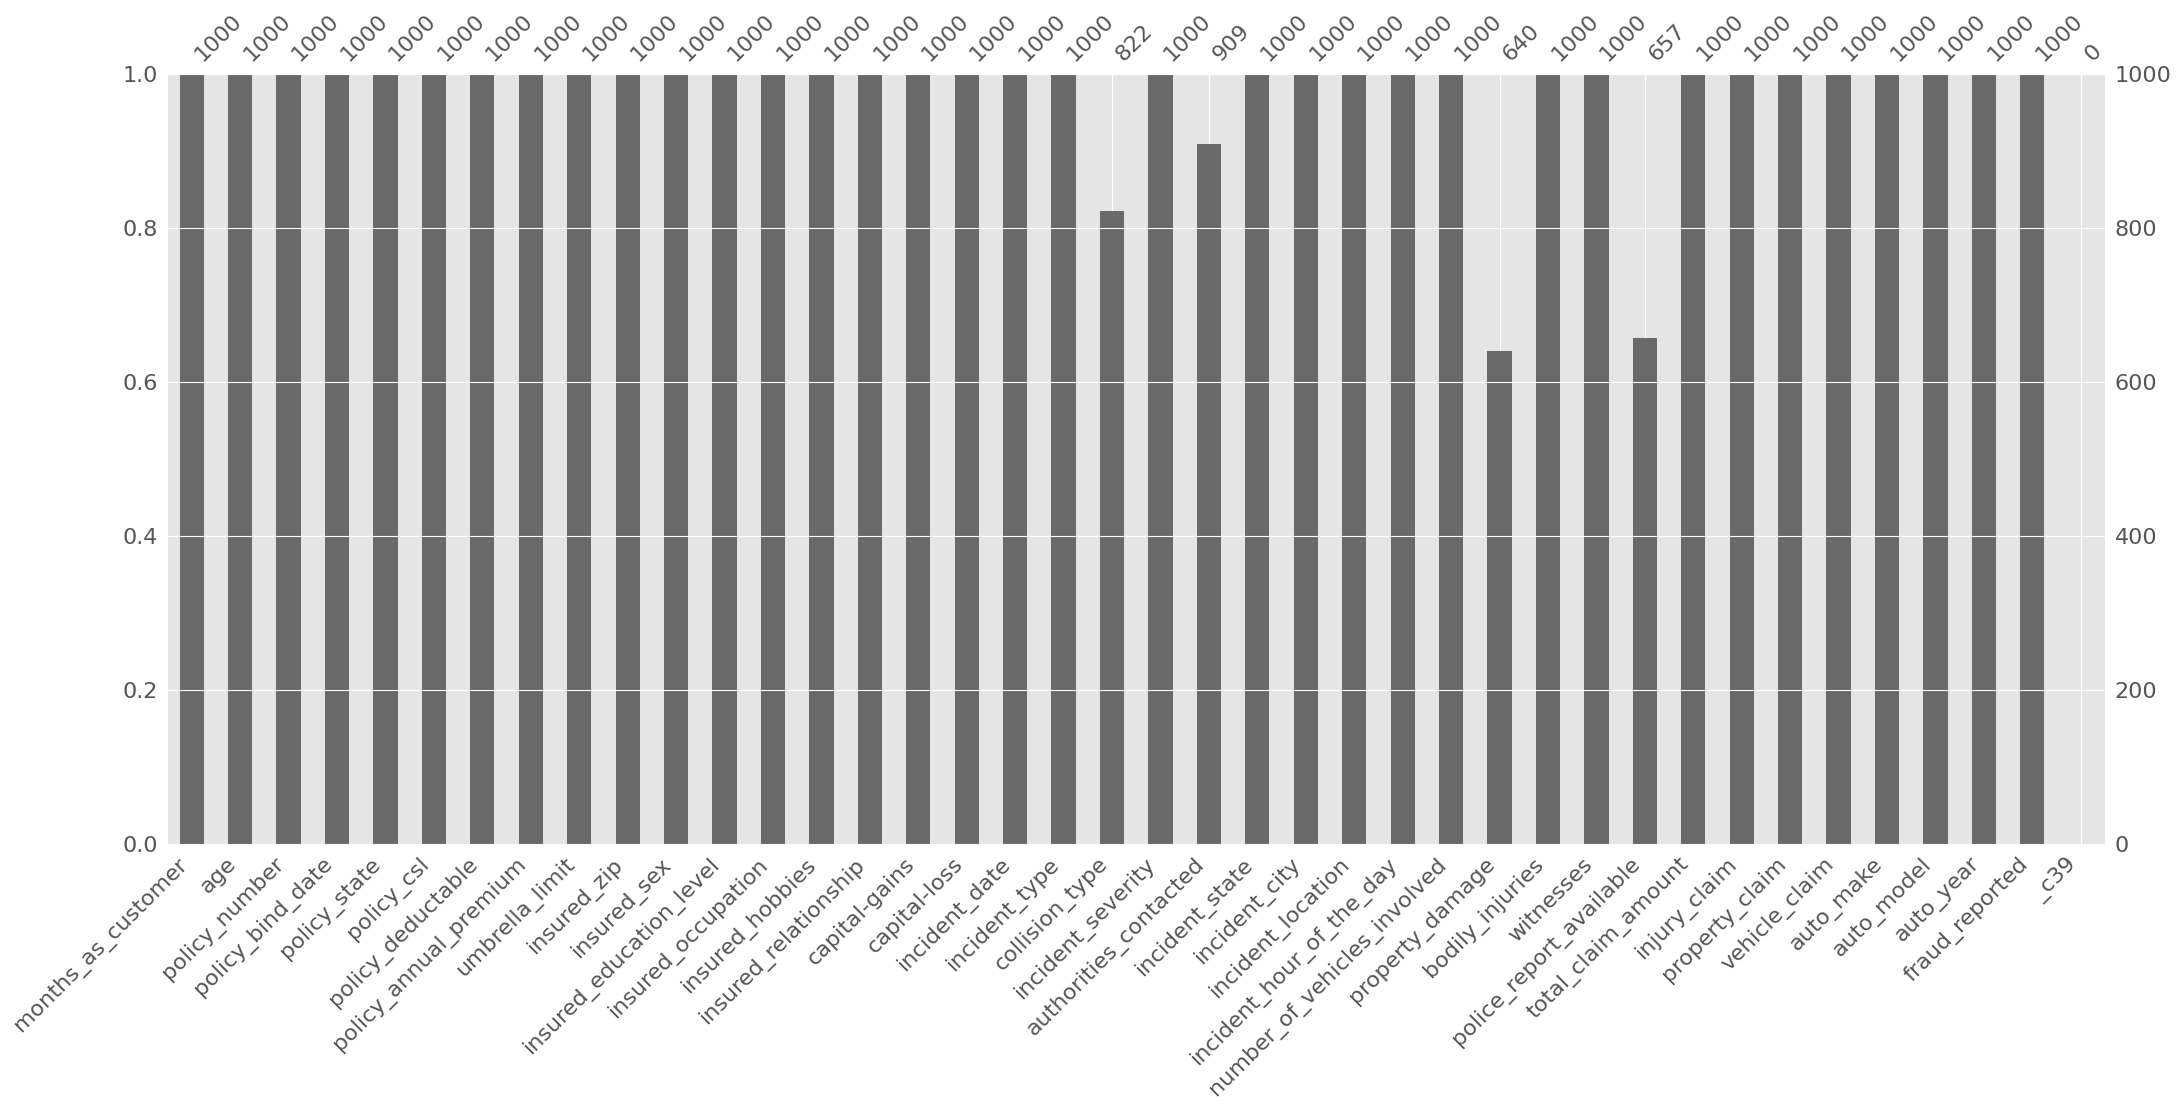

In [11]:
msno.bar(df)
plt.show()

Handling Missing values

In [12]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])


In [13]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])


In [14]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])


In [15]:
df['authorities_contacted']

0      Police
1      Police
2      Police
3      Police
4         NaN
        ...  
995      Fire
996      Fire
997    Police
998     Other
999    Police
Name: authorities_contacted, Length: 1000, dtype: object

In [16]:
# df['authorities_contacted'].fillna(, inplace=True)

In [17]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [18]:
# Step 1: Convert `policy_bind_date` and `incident_date` to datetime format
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors='coerce')
df['incident_date'] = pd.to_datetime(df['incident_date'], errors='coerce')

# Step 2: Calculate the time difference in days (you can also calculate in months if you prefer)
df['days_to_claim'] = (df['incident_date'] - df['policy_bind_date']).dt.days


In [19]:
df['days_to_claim']

0       100
1      3130
2      5282
3      8996
4       256
       ... 
995    8622
996     384
997    4358
998    1196
999    6681
Name: days_to_claim, Length: 1000, dtype: int64

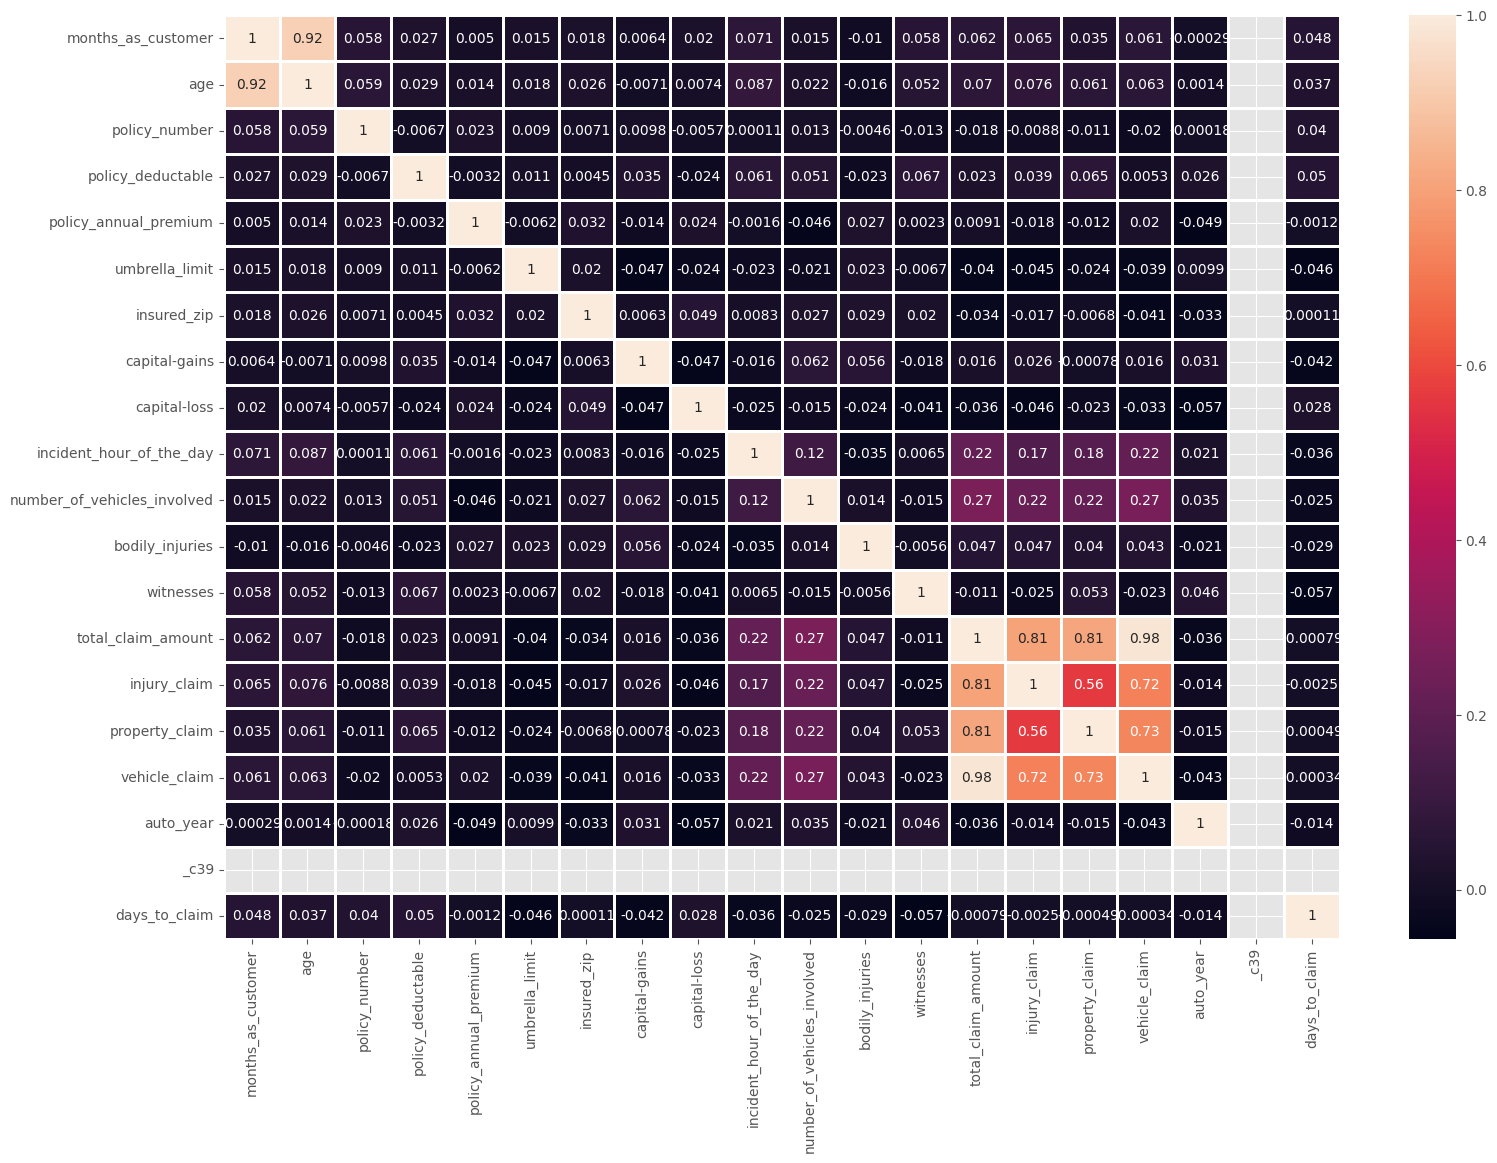

In [20]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Now compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize = (18, 12))
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidths = 1)
plt.show()


In [21]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [22]:
to_drop = ['policy_number','policy_state','insured_zip','insured_sex', 'insured_relationship', 'incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','collision_type', 'number_of_vehicles_involved', 'auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [23]:
df.head()

,months_as_customer,age,policy_bind_date,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,insured_occupation,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,days_to_claim
0,328,48,2014-10-17,250/500,1000,1406.91,0,MD,craft-repair,53300,...,YES,1,2,YES,71610,6510,13020,52080,Y,100
1,228,42,2006-06-27,250/500,2000,1197.22,5000000,MD,machine-op-inspct,0,...,NO,0,0,NO,5070,780,780,3510,Y,3130
2,134,29,2000-09-06,100/300,2000,1413.14,5000000,PhD,sales,35100,...,NO,2,3,NO,34650,7700,3850,23100,N,5282
3,256,41,1990-05-25,250/500,2000,1415.74,6000000,PhD,armed-forces,48900,...,NO,1,2,NO,63400,6340,6340,50720,Y,8996
4,228,44,2014-06-06,500/1000,1000,1583.91,6000000,Associate,sales,66000,...,NO,0,1,NO,6500,1300,650,4550,N,256


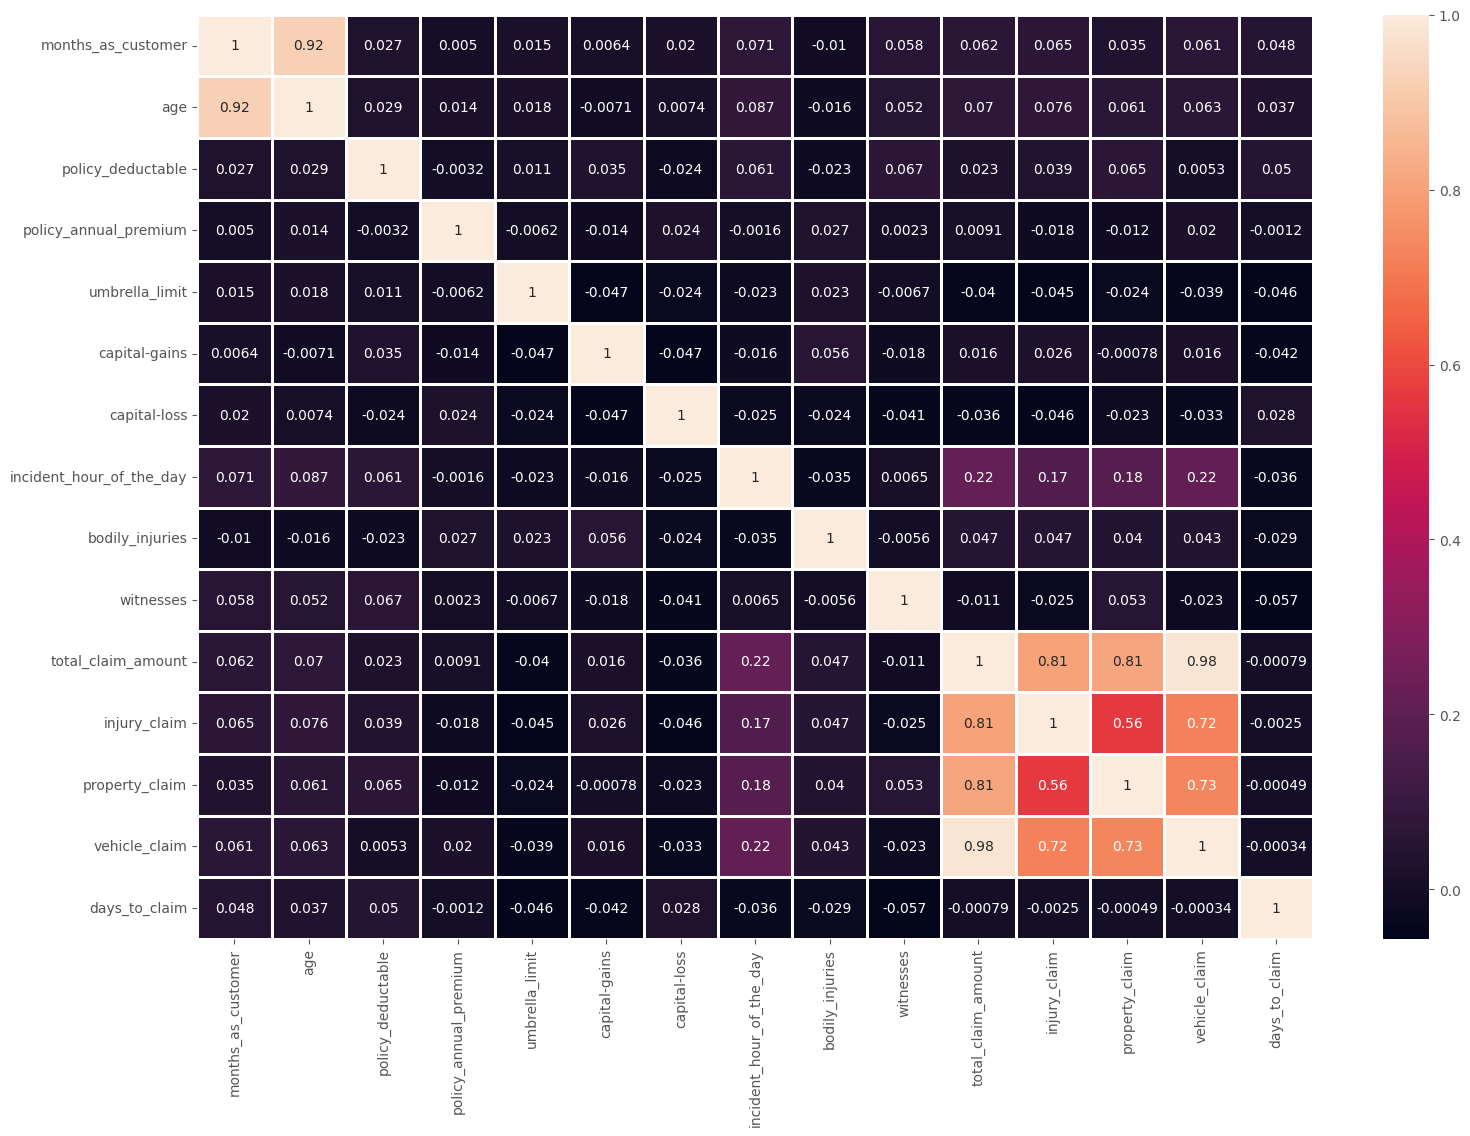

In [24]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Now compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize = (18, 12))
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidths = 1)
plt.show()


In [25]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [26]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   months_as_customer        1000 non-null   int64         
 1   policy_bind_date          1000 non-null   datetime64[ns]
 2   policy_csl                1000 non-null   object        
 3   policy_deductable         1000 non-null   int64         
 4   policy_annual_premium     1000 non-null   float64       
 5   umbrella_limit            1000 non-null   int64         
 6   insured_education_level   1000 non-null   object        
 7   insured_occupation        1000 non-null   object        
 8   capital-gains             1000 non-null   int64         
 9   capital-loss              1000 non-null   int64         
 10  incident_type             1000 non-null   object        
 11  incident_severity         1000 non-null   object        
 12  authorities_contacted

In [27]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

Categorical Values encoding

In [28]:
cat_df = X.select_dtypes(include = ['object'])


In [29]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' nan 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [30]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [31]:
cat_df.head()


,policy_csl_250/500,policy_csl_500/1000,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,...,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,True,True,True
1,True,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,True,True,False,...,True,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False


In [32]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [33]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,days_to_claim
0,328,1000,0,53300,0,5,1,2,6510,13020,52080,100
1,228,2000,5000000,0,0,8,0,0,780,780,3510,3130
2,134,2000,5000000,35100,0,7,2,3,7700,3850,23100,5282
3,256,2000,6000000,48900,-62400,5,1,2,6340,6340,50720,8996
4,228,1000,6000000,66000,-46000,20,0,1,1300,650,4550,256


In [34]:
num_df.describe()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,days_to_claim
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,1136.000000,1.101000e+06,25126.100000,-26793.700000,11.644000,0.992000,1.487000,7433.420000,7399.570000,37928.950000,4739.140000
std,115.113174,611.864673,2.297407e+06,27872.187708,28104.096686,6.951373,0.820127,1.111335,4880.951853,4824.726179,18886.252893,2686.430702
min,0.000000,500.000000,-1.000000e+06,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,-20.000000
25%,115.750000,500.000000,0.000000e+00,0.000000,-51500.000000,6.000000,0.000000,1.000000,4295.000000,4445.000000,30292.500000,2484.000000
50%,199.500000,1000.000000,0.000000e+00,0.000000,-23250.000000,12.000000,1.000000,1.000000,6775.000000,6750.000000,42100.000000,4682.000000
75%,276.250000,2000.000000,0.000000e+00,51025.000000,0.000000,17.000000,2.000000,2.000000,11305.000000,10885.000000,50822.500000,7068.000000
max,479.000000,2000.000000,1.000000e+07,100500.000000,0.000000,23.000000,2.000000,3.000000,21450.000000,23670.000000,79560.000000,9172.000000


In [35]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

In [36]:
X.head()


,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,bodily_injuries,witnesses,injury_claim,property_claim,...,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,2,6510,13020,...,True,False,False,False,False,False,False,True,True,True
1,228,2000,5000000,0,0,8,0,0,780,780,...,False,True,True,False,False,False,False,True,False,False
2,134,2000,5000000,35100,0,7,2,3,7700,3850,...,False,False,True,False,False,False,False,True,False,False
3,256,2000,6000000,48900,-62400,5,1,2,6340,6340,...,True,False,False,False,False,False,False,True,False,False
4,228,1000,6000000,66000,-46000,20,0,1,1300,650,...,False,True,True,False,False,False,False,False,False,False


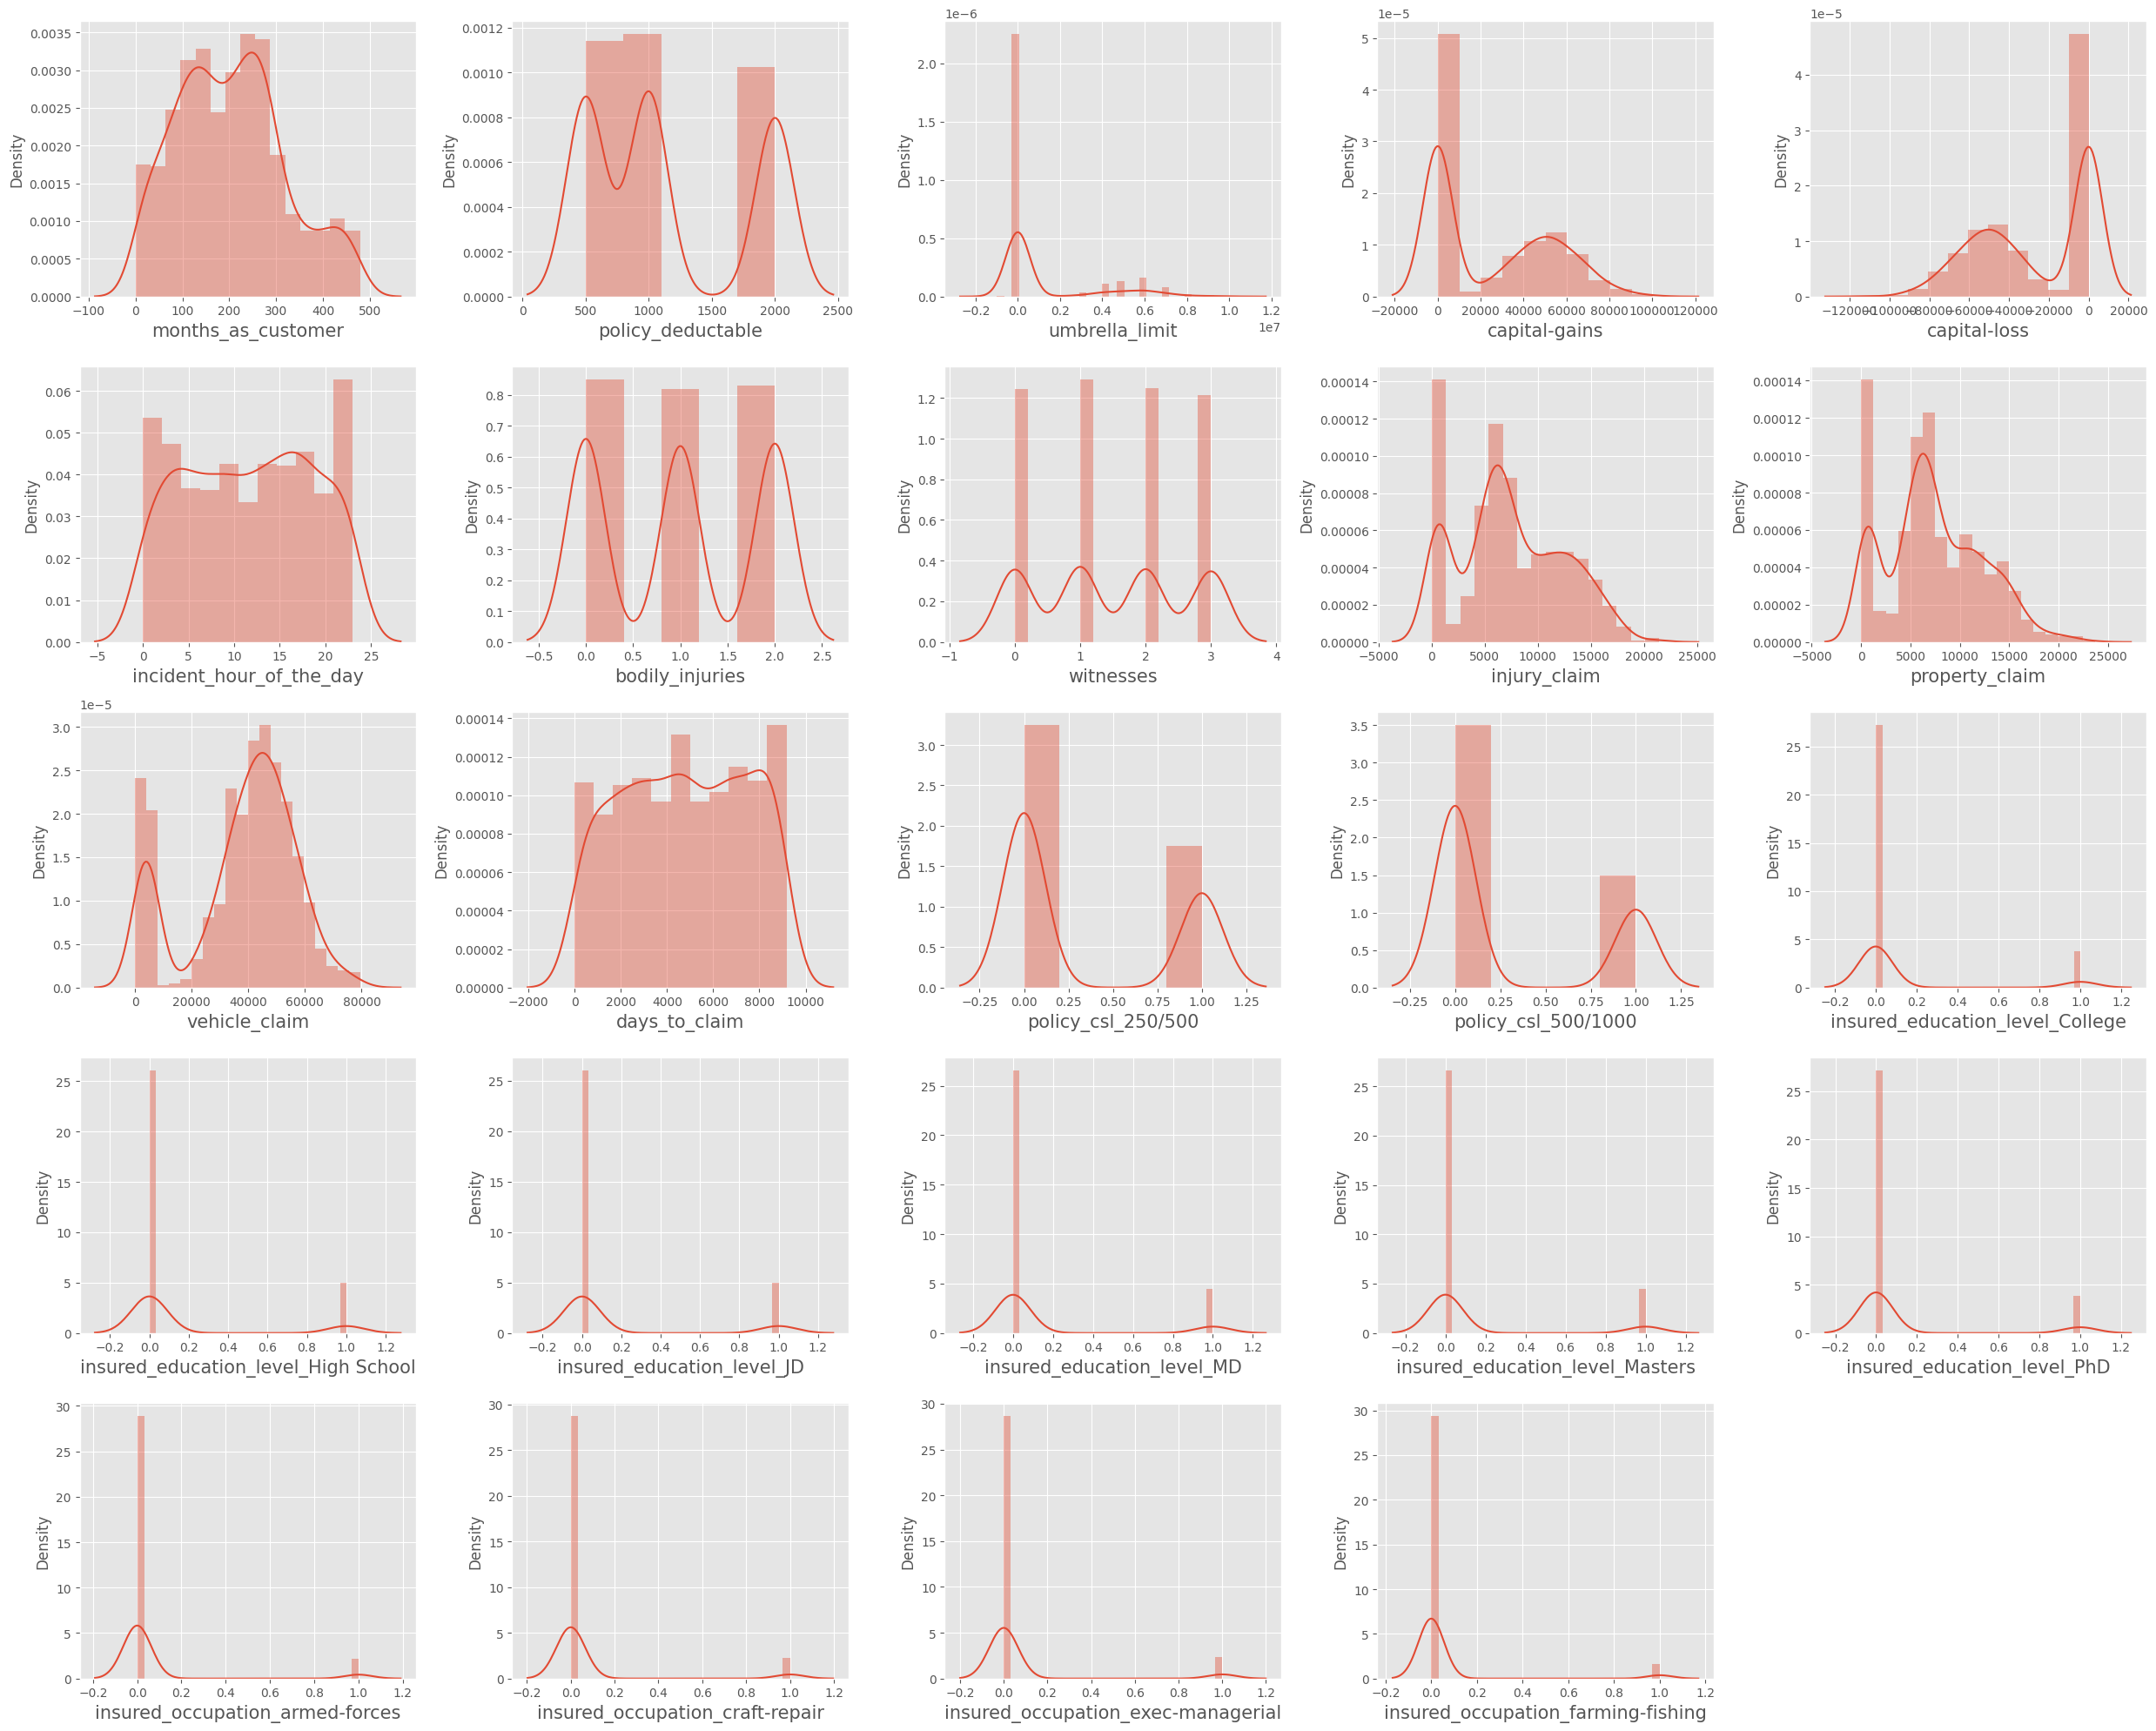

In [37]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Outliers detection

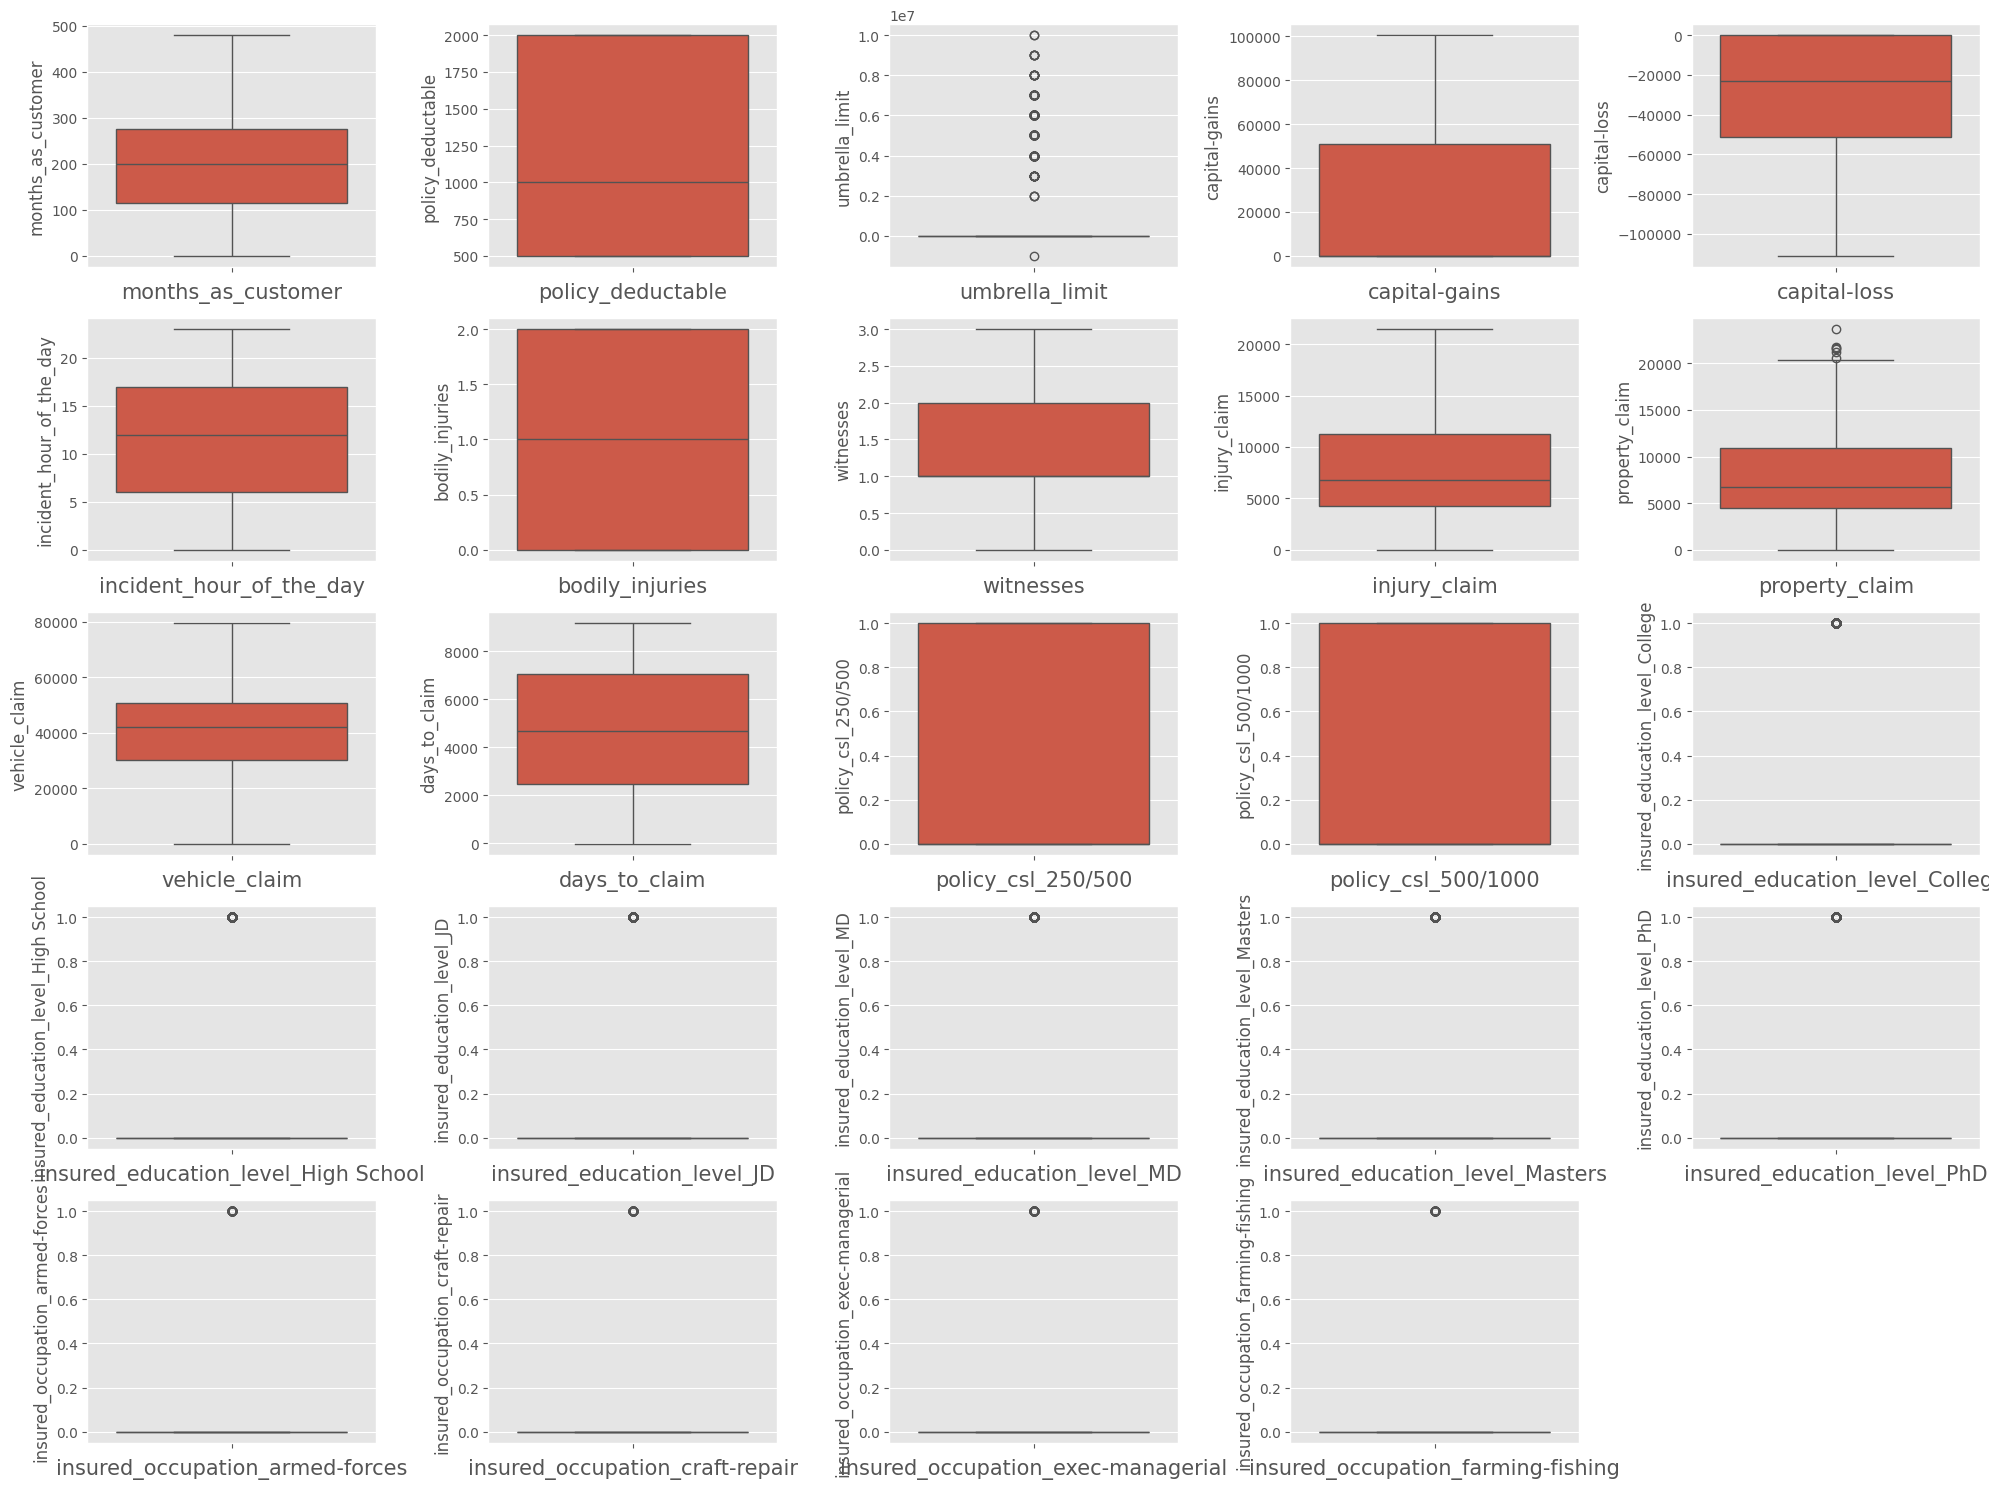

In [38]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [39]:
!pip install scikit-learn

In [40]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [41]:

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 233 to 155
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   months_as_customer                      750 non-null    int64
 1   policy_deductable                       750 non-null    int64
 2   umbrella_limit                          750 non-null    int64
 3   capital-gains                           750 non-null    int64
 4   capital-loss                            750 non-null    int64
 5   incident_hour_of_the_day                750 non-null    int64
 6   bodily_injuries                         750 non-null    int64
 7   witnesses                               750 non-null    int64
 8   injury_claim                            750 non-null    int64
 9   property_claim                          750 non-null    int64
 10  vehicle_claim                           750 non-null    int64
 11  days_to_claim         

In [42]:
df.describe(include='all')


,months_as_customer,policy_bind_date,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,insured_occupation,capital-gains,capital-loss,...,incident_hour_of_the_day,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported,days_to_claim
count,1000.000000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000,1000,1000.000000,1000.000000,...,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,3,NaN,NaN,NaN,7,14,NaN,NaN,...,NaN,2,NaN,NaN,2,NaN,NaN,NaN,2,NaN
top,NaN,NaN,250/500,NaN,NaN,NaN,JD,machine-op-inspct,NaN,NaN,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,351,NaN,NaN,NaN,161,93,NaN,NaN,...,NaN,698,NaN,NaN,686,NaN,NaN,NaN,753,NaN
mean,203.954000,2002-02-08 04:40:47.999999872,NaN,1136.000000,1256.406150,1.101000e+06,NaN,NaN,25126.100000,-26793.700000,...,11.644000,NaN,0.992000,1.487000,NaN,7433.420000,7399.570000,37928.950000,NaN,4739.140000
min,0.000000,1990-01-08 00:00:00,NaN,500.000000,433.330000,-1.000000e+06,NaN,NaN,0.000000,-111100.000000,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,70.000000,NaN,-20.000000
25%,115.750000,1995-09-19 00:00:00,NaN,500.000000,1089.607500,0.000000e+00,NaN,NaN,0.000000,-51500.000000,...,6.000000,NaN,0.000000,1.000000,NaN,4295.000000,4445.000000,30292.500000,NaN,2484.000000
50%,199.500000,2002-04-01 12:00:00,NaN,1000.000000,1257.200000,0.000000e+00,NaN,NaN,0.000000,-23250.000000,...,12.000000,NaN,1.000000,1.000000,NaN,6775.000000,6750.000000,42100.000000,NaN,4682.000000
75%,276.250000,2008-04-21 12:00:00,NaN,2000.000000,1415.695000,0.000000e+00,NaN,NaN,51025.000000,0.000000,...,17.000000,NaN,2.000000,2.000000,NaN,11305.000000,10885.000000,50822.500000,NaN,7068.000000
max,479.000000,2015-02-22 00:00:00,NaN,2000.000000,2047.590000,1.000000e+07,NaN,NaN,100500.000000,0.000000,...,23.000000,NaN,2.000000,3.000000,NaN,21450.000000,23670.000000,79560.000000,NaN,9172.000000


In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [44]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.716
[[153  45]
 [ 26  26]]
              precision    recall  f1-score   support

           N       0.85      0.77      0.81       198
           Y       0.37      0.50      0.42        52

    accuracy                           0.72       250
   macro avg       0.61      0.64      0.62       250
weighted avg       0.75      0.72      0.73       250



In [45]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [46]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2}
0.7959999999999999


In [47]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [48]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8
Test accuracy of Decision Tree is : 0.86
[[177  21]
 [ 14  38]]
              precision    recall  f1-score   support

           N       0.93      0.89      0.91       198
           Y       0.64      0.73      0.68        52

    accuracy                           0.86       250
   macro avg       0.79      0.81      0.80       250
weighted avg       0.87      0.86      0.86       250

